In [1]:

import os
import numpy as np
import pickle
import torch

import CASBI
from ili.validation.metrics import PosteriorCoverage
# os.environ['CUDA_LAUNCH_BLOCKING'] = '1'


In [14]:
for file in os.listdir('./file/'):
    arr = np.load(os.path.join('./file', file))
    theta = torch.tensor(arr['theta'])
    x = torch.tensor(arr['x'])
    print(f'Galaxy: {file} Most massive merger mass:, {np.log10(theta[:, 0].max()):.2f}')

Galaxy: 2.79e12.02000.npz Most massive merger mass:, 9.55
Galaxy: 1.12e12.02000.npz Most massive merger mass:, 8.89
Galaxy: 6.96e11.01024.npz Most massive merger mass:, 8.86
Galaxy: 7.08e11.01024.npz Most massive merger mass:, 8.35
Galaxy: 7.55e11.01024.npz Most massive merger mass:, 8.91
Galaxy: 8.26e11.02000.npz Most massive merger mass:, 8.84


In [3]:
with open('../posterior/posterior_0.0/posterior.pkl', 'rb') as file:
    posterior_ensamble = pickle.load(file)

In [11]:
x = x.view((100, 3, 64, 64))

In [12]:
plot_hist = ["coverage", "histogram", "predictions", "tarp"]
metric = PosteriorCoverage(
    num_samples=2_000, sample_method='direct',
    labels=[rf'$\log_{{10}}(M_{{s}}) [M_{{\odot}}]$', rf'$\log_{{10}}(\tau) [Gyr]$'], plot_list = plot_hist
)

fig = metric(
    posterior=posterior_ensamble,
    x=x, theta=torch.log10(theta[:, :2]))

 10%|█         | 10/100 [00:08<01:17,  1.16it/s]


KeyboardInterrupt: 

In [22]:
torch.log10(theta)

tensor([[ 9.5471,  0.9860],
        [ 9.5366,  1.0493],
        [ 9.5361,  1.0412],
        [ 9.5344,  1.0188],
        [ 9.3528,  0.4948],
        [ 9.3117,  0.4751],
        [ 9.1860,  0.4218],
        [ 8.8636,  0.9264],
        [ 8.7056,  0.9952],
        [ 8.6799,  1.0042],
        [ 8.6572,  0.3199],
        [ 8.5765,  1.0274],
        [ 8.5203,  0.3738],
        [ 8.3296,  0.4218],
        [ 8.3160,  0.7595],
        [ 8.2892,  1.0412],
        [ 8.2792,  0.4330],
        [ 8.2426,  1.0357],
        [ 8.2248,  0.4439],
        [ 8.1864,  0.5226],
        [ 8.1464,  0.9952],
        [ 8.0228,  0.6668],
        [ 7.9277,  0.3477],
        [ 7.9174,  0.9264],
        [ 7.8740,  1.0439],
        [ 7.8620,  1.0042],
        [ 7.8375,  0.4751],
        [ 7.8354,  0.5735],
        [ 7.8093,  0.3199],
        [ 7.7726,  1.0926],
        [ 7.6590,  0.3557],
        [ 7.6588,  0.4218],
        [ 7.6442,  0.0709],
        [ 7.5925,  0.9767],
        [ 7.5739,  0.3199],
        [ 7.5695,  0

Galaxy: 2.79e12.02000.npz Most massive merger mass:, 9.55


100%|██████████| 100/100 [00:00<00:00, 109.85it/s]


Galaxy: 1.12e12.02000.npz Most massive merger mass:, 8.89


100%|██████████| 100/100 [00:00<00:00, 111.98it/s]


Galaxy: 6.96e11.01024.npz Most massive merger mass:, 8.86


100%|██████████| 100/100 [00:52<00:00,  1.89it/s]
/export/home/vgiusepp/miniconda3/envs/test_sstrax/lib/python3.12/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
/export/home/vgiusepp/miniconda3/envs/test_sstrax/lib/python3.12/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start
  0%|          | 0/100 [00:00<?, ?it/s]/export/home/vgiusepp/miniconda3/envs/test_sstrax/lib/python3.12/site-packages/tarp/drp.py:92: RuntimeWarning: invalid value encountered in divide
  samples = (samples - low) / (high - low + 1e-10)
/export/home/vgiusepp/miniconda3/envs/test_sstrax/lib/python3.12/site-packages/tarp/drp.py:93: RuntimeWarning: invalid value encountered in subtract
  theta = (theta - low) / (high - low + 1e-10)
/export/home/vgiusepp/miniconda3/envs/test_sstrax/lib/python3.12/site-packages/tarp/drp.py:93: RuntimeWarning: invalid value encountered in divide
  theta = (theta -

Galaxy: 7.08e11.01024.npz Most massive merger mass:, 8.35


100%|██████████| 100/100 [00:00<00:00, 105.85it/s]


Galaxy: 7.55e11.01024.npz Most massive merger mass:, 8.91


 71%|███████   | 71/100 [00:37<00:15,  1.90it/s]


KeyboardInterrupt: 

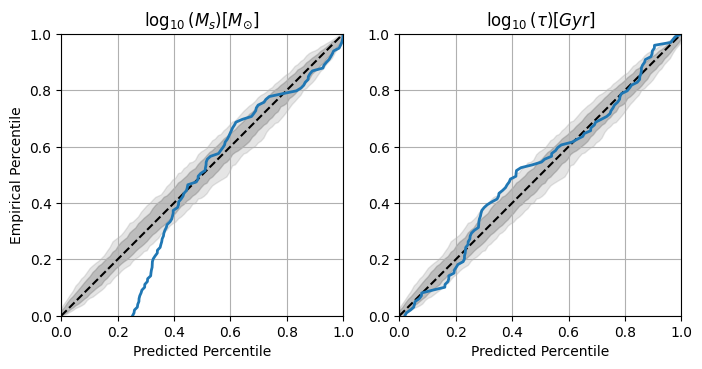

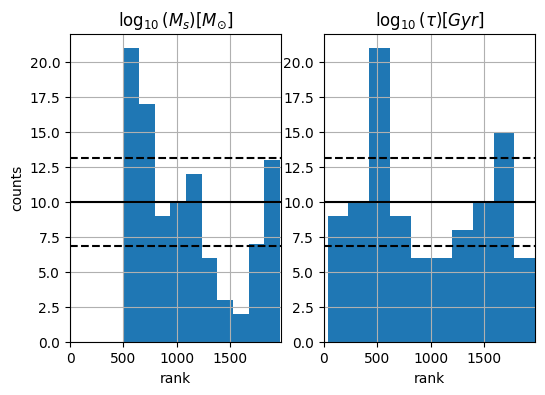

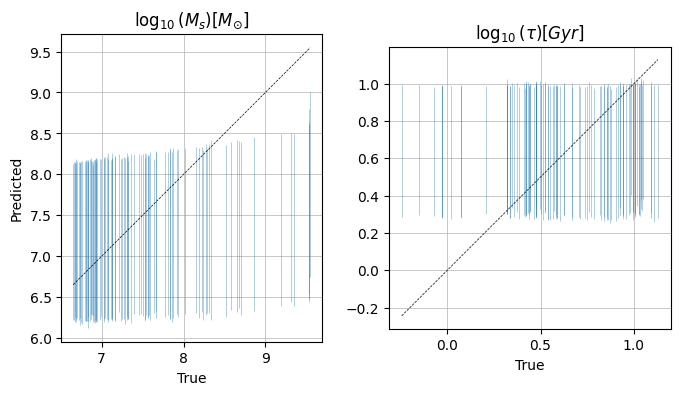

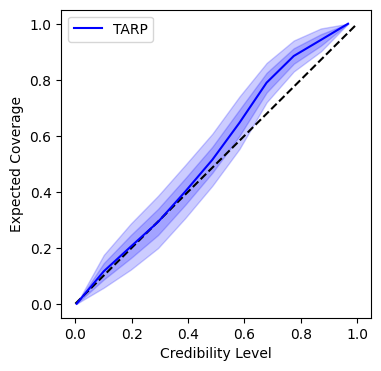

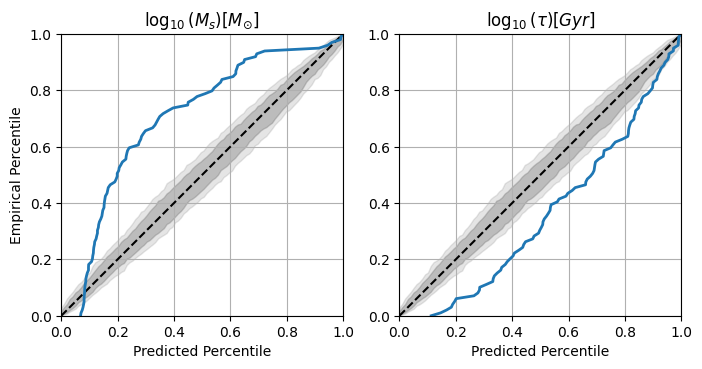

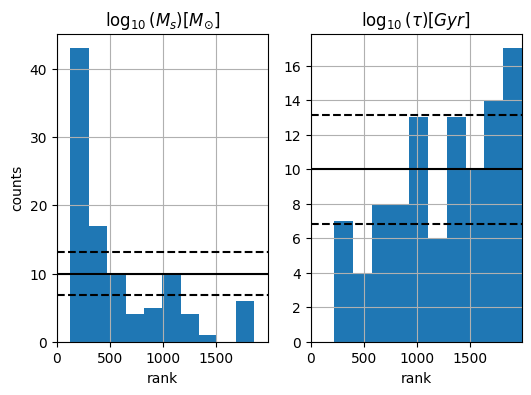

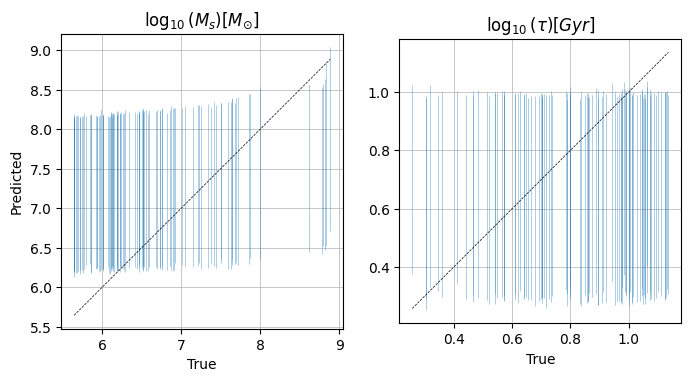

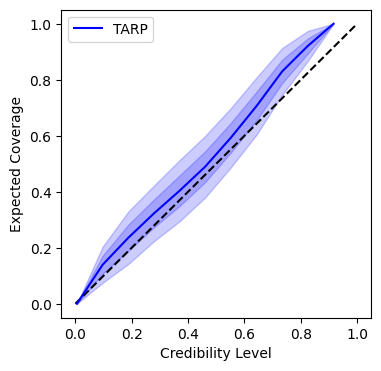

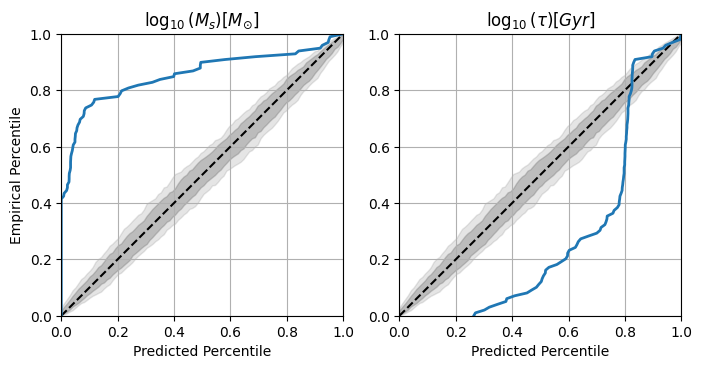

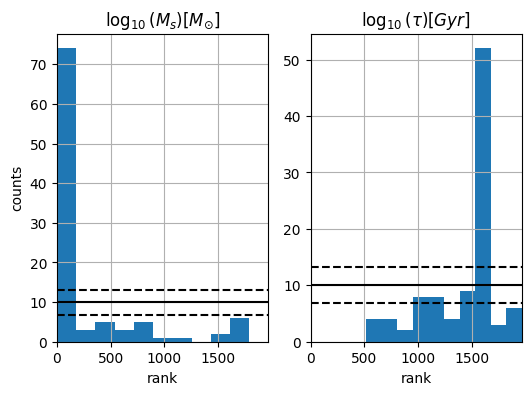

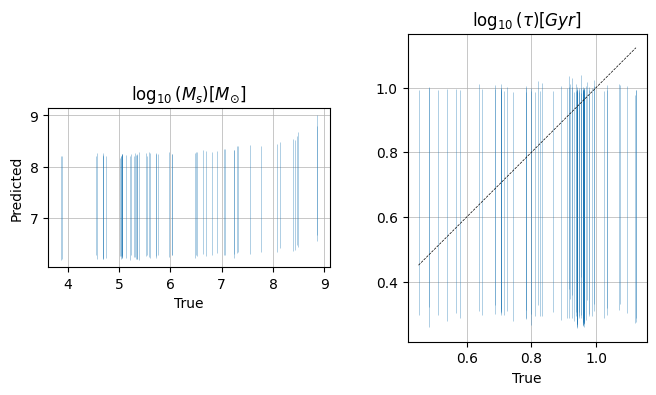

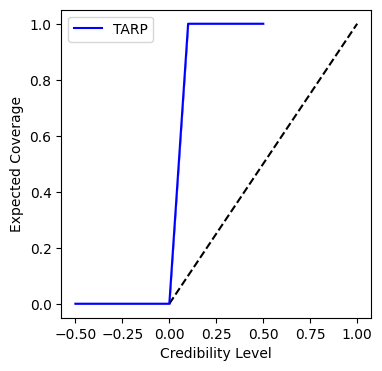

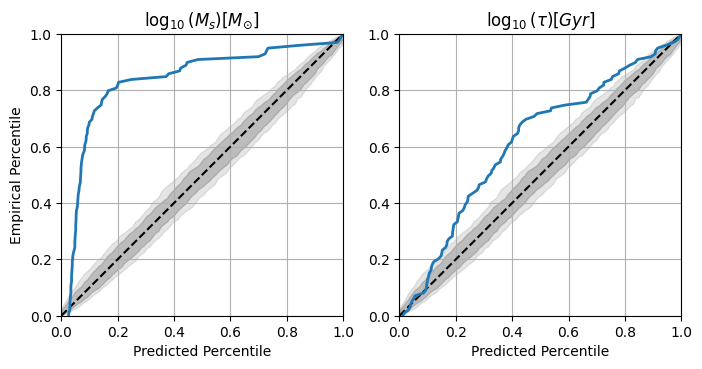

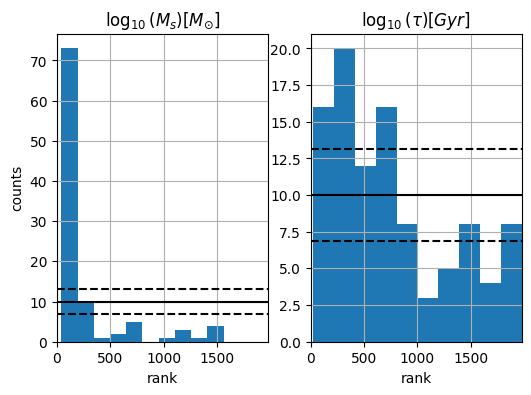

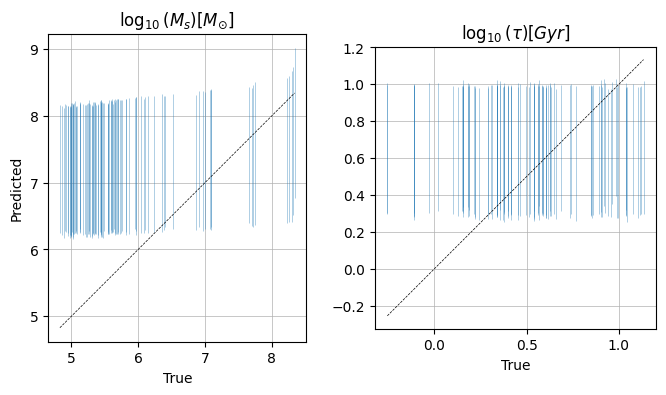

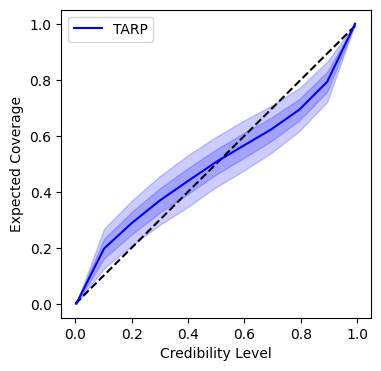

In [23]:
with open('../posterior/posterior_0.0/posterior.pkl', 'rb') as model:
    posterior_ensamble = pickle.load(model)
    
for file in os.listdir('./file/'):
    arr = np.load(os.path.join('./file', file))
    theta = torch.tensor(arr['theta'])
    x = torch.tensor(arr['x']).view((100, 3, 64, 64))
    print(f'Galaxy: {file} Most massive merger mass:, {np.log10(theta[:, 0].max()):.2f}')
    
    plot_hist = ["coverage", "histogram", "predictions", "tarp"]
    metric = PosteriorCoverage(
        num_samples=2_000, sample_method='direct',
        labels=[rf'$\log_{{10}}(M_{{s}}) [M_{{\odot}}]$', rf'$\log_{{10}}(\tau) [Gyr]$'], plot_list = plot_hist
    )

    fig = metric(
        posterior=posterior_ensamble,
        x=torch.log10(x+1.), theta=torch.log10(theta))
    
    fig[0].savefig(f'./plot/{file[:-4]}_coverage.pdf')
    fig[1].savefig(f'./plot/{file[:-4]}_histogram.pdf')
    fig[2].savefig(f'./plot/{file[:-4]}_predictions.pdf')
    fig[3].savefig(f'./plot/{file[:-4]}_tarp.pdf')

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.savefig()

TypeError: Figure.savefig() missing 1 required positional argument: 'fname'

<Figure size 640x480 with 0 Axes>